In [1]:
#import nessesary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#import data

data = pd.read_csv('big_mart_data.csv')
data.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [3]:
data.shape

(8523, 12)

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#checking nulls

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#unique values in item fat content

data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
#unique values in outlet establishment year

data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [8]:
# determining and creating a new column 'outlet age' with reference to 2018 

data['Outlet_Age']=2018 - data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9


In [9]:
#unique outlet sizes

data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
#count of unique outlet sizes

data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
data['Outlet_Size'].mode()[0]

'Medium'

In [12]:
# replacing missing values in outlet sizes with 'medium' (mode)

data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [13]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

the output shows that 'medium' is the most commonly occuring value

In [14]:
#Replacing missing values in item weight with mean weight

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

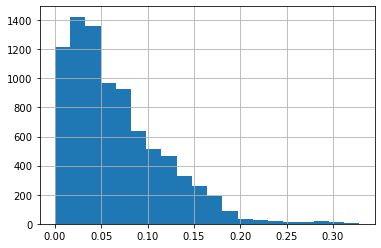

In [15]:
#histogram to reveal distribution

data['Item_Visibility'].hist(bins=20)

In [16]:
# detecting outliers


Q1 = data ['Item_Visibility'].quantile(0.25)

In [17]:

Q3 = data ['Item_Visibility'].quantile(0.75)

In [18]:
#interquantile range(IQR)

IQR = Q3 - Q1

In [19]:
#remove outliers from the data 
#store in fill_data

fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [20]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9


In [21]:
fill_data.shape

(8379, 13)

In [22]:
data.shape

(8523, 13)

In [23]:
#modify item visibility into categories intead of numerical
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'], [0.000,0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])



In [24]:
data['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     903
Name: Item_Visibility_bins, dtype: int64

In [25]:
# replace null with low viz

data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan, 'Low Viz', regex = True)

In [26]:
# replace typos and diff reps of low fat

data['Item_Fat_Content']= data['Item_Fat_Content'].replace(["low fat", 'LF'], 'Low Fat')

In [27]:
#replace all reps of reg with regular

data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg', 'Regular')

In [28]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
#code all categorical variables as numeric using label encoder from sklearn
#initialize label encoder


le = LabelEncoder()

In [30]:
# transform item fat content

data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])



In [31]:
#transform item visibilty bins 

data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

In [32]:
# transform outlet size

data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [33]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [34]:
#print unique values of outlet type

data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [35]:
#create dummies for outlet type 

dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [36]:
# explore column item identifier

data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [37]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [38]:
# reduce multiple categories by mapping Item identifier

data['Item_Type_Combined'] = data ['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data ['Item_Type_Combined'].map({'FD' : 'Food',
                                                                'NC': 'Non-Consumable',
                                                                'DR': 'Drinks'})

In [39]:
#now we have only 3 categories

data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [40]:
data.shape

(8523, 15)

In [41]:
# perform one hot encoding for all colummns as model works onnueric and not categorical values

data= pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined'])

In [42]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_

In [43]:
import warnings

warnings.filterwarnings('ignore')

#drop columns which have been converted to diff data types

data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

# divide dataset into train and test 



In [44]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,9,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,20,3,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,31,3,1,0,...,1,0,0,0,1,0,0,0,0,1


In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis = 1)
y = data.Item_Outlet_Sales

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [47]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
4931,14.500000,0.089960,159.5604,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4148,12.857645,0.009535,64.5510,33,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
7423,11.500000,0.017742,129.6626,11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4836,10.195000,0.000000,143.1154,11,3,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
944,21.000000,0.049264,195.0478,31,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,12.650000,0.035404,230.6010,14,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2229,12.857645,0.054221,129.1310,33,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
6546,12.300000,0.106543,173.2396,16,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
7652,8.895000,0.081253,49.8008,16,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [48]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
3865,10.695000,0.101542,173.7712,20,2,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
6191,8.880000,0.099024,208.5270,9,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
5584,5.260000,0.041837,161.8868,19,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0
5388,18.250000,0.000000,224.1062,9,3,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1484,16.750000,0.032581,192.1162,14,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.200000,0.020280,49.1034,20,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
7891,12.857645,0.025616,188.1872,33,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
4859,13.500000,0.000000,78.3960,14,3,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
3264,18.700000,0.104890,121.4072,16,2,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [49]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression 



In [50]:
#create a test train split

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, random_state=42, test_size = 0.25)

In [51]:
#fit linear reg to training dataset

lin = LinearRegression()

In [52]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [53]:
#find the coefficient and intercept of the line
#use xtrain and ytrain for linear regression 
print(lin.coef_)
lin.intercept_

[-4.12602392e-01 -1.39427989e+02  1.55381973e+01 -3.94465045e+01
  1.10447806e+01 -3.93180672e+01  3.93180672e+01  2.30228480e+02
 -1.72914830e+01 -2.12936997e+02  5.48777100e+02 -3.04744685e+02
 -2.44032415e+02 -1.63487441e+03 -1.47762006e+02 -4.29959767e+02
  2.21259618e+03  5.65254445e+00 -1.62538799e+01  1.06013355e+01]


1130.9610579215869

In [54]:
#predict test set results of training data 

predictions = lin.predict(xtest)
predictions

array([4029.38344317, 1690.13176556,  766.14501987, ..., 1735.51615595,
        750.32837346, 3862.7545477 ])

In [55]:
import math

In [56]:
# find RMSE for the model 

print (math.sqrt(mean_squared_error(ytest, predictions)))

1081.5842263682882


In [57]:
#predict the column item outlet sales of the test dataset

y_sales_pred = lin.predict(X_test)
y_sales_pred

array([2484.14690752, 2475.98541133, 2217.08378497, ..., 2747.0735784 ,
        833.98818628, 2379.26199306])

### STEPS


1. made a hypothesis about the data without looking at it
2. moved on to data exploration and found some nuances in the data which required remediation
3. performed data cleaning and feature engineering and imputed the missing values and solved other irregularities
4. made new features and so made the data model-friendly using one hot encoding 
5. built a regression model